In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
d3=pd.read_csv('winequality.csv')
d3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
d3.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
#there are no null values

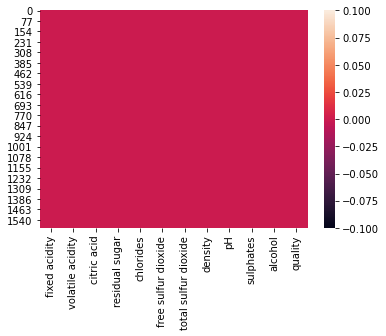

In [5]:
sns.heatmap(d3.isnull())

In [6]:
d3.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
#the wine quality ranges from 3 to 8.quality values are more concentrated in range 5 to 7

In [8]:
d3.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
#mean is higher than median for fixed acidity,free sulfur dioxide.that means they are right skewed datas
# there is a large difference between 75% and maximum for residual sugar,free sulfur dioxide and total sulfur dioxide.so outliers are present in this dataset

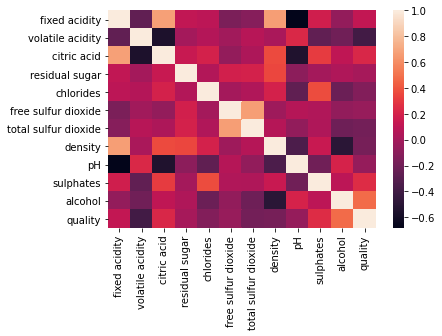

In [10]:
d3cor=d3.corr()
sns.heatmap(d3cor)

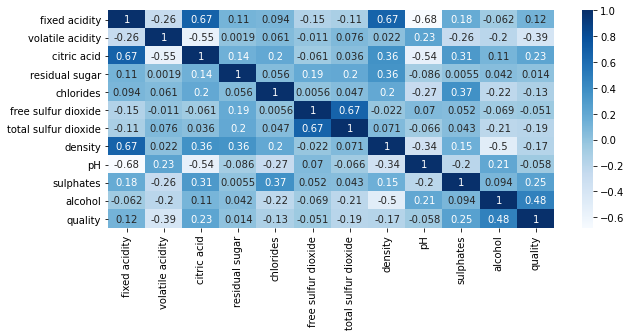

In [11]:
plt.figure(figsize=(10,4))
sns.heatmap(d3cor,cmap='Blues',annot=True)

In [12]:
#quality has a strong negative relation with volatile acidity and has a positive relation with alcohol

In [13]:
collist=d3.columns.values
ncol=12
nrows=5

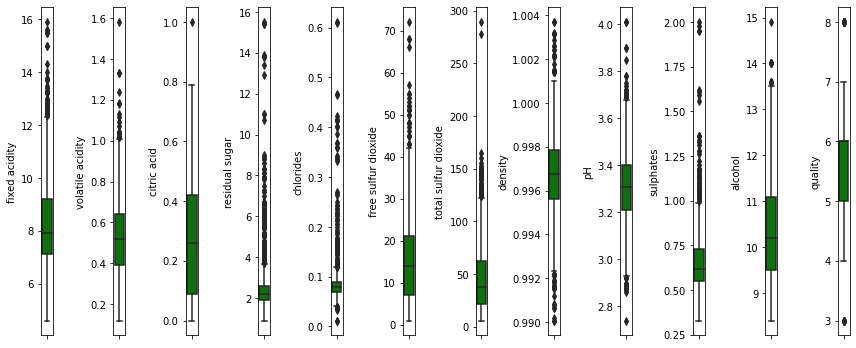

In [14]:
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d3[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [15]:
d3.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

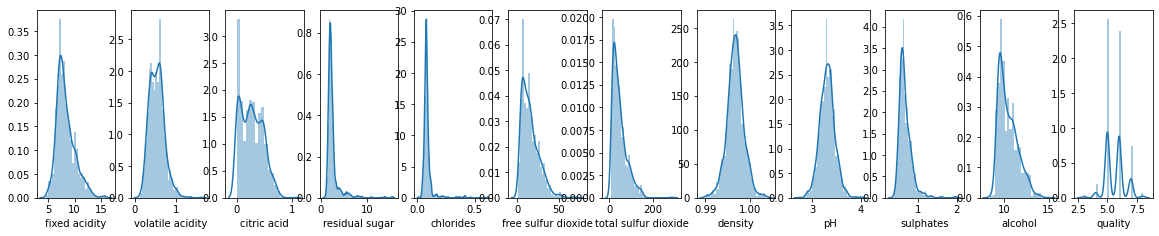

In [16]:
plt.figure(figsize=(20,20))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d3[collist[i]])

In [17]:
#fixed acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide and sulphates are highly skewed datas.

In [18]:
import numpy as np
for col in d3.columns:
    if d3.skew().loc[col]>0.55:
        d3[col]=np.log1p(d3[col])
    

In [19]:
d3.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.318337
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.610497
alcohol                 0.677798
quality                 0.217802
dtype: float64

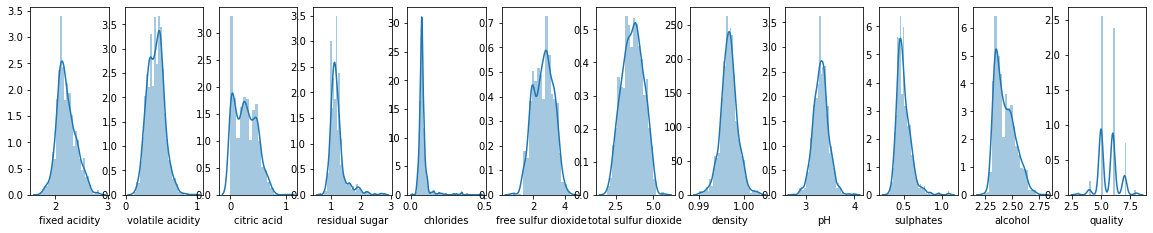

In [20]:
plt.figure(figsize=(20,20))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d3[collist[i]])

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(d3))
z

array([[0.49206951, 0.98751431, 1.39147228, ..., 0.60176716, 0.99166574,
        0.78782264],
       [0.23078609, 1.86351245, 1.39147228, ..., 0.18912335, 0.57421133,
        0.78782264],
       [0.23078609, 1.28941633, 1.18607043, ..., 0.00317263, 0.57421133,
        0.78782264],
       ...,
       [1.28039794, 0.04406793, 0.72391627, ..., 0.6247813 , 0.59120544,
        0.45084835],
       [1.59690876, 0.70125933, 0.77526673, ..., 0.37801568, 0.1719405 ,
        0.78782264],
       [1.51609325, 1.28074974, 1.02199944, ..., 0.06131178, 0.59120544,
        0.45084835]])

In [22]:
threshold=3
print(np.where(z>3))

(array([  13,   17,   17,   19,   33,   42,   43,   45,   81,   81,   83,
         86,   88,   91,   92,   95,  106,  106,  126,  127,  142,  144,
        147,  151,  151,  151,  151,  163,  164,  169,  169,  181,  226,
        226,  240,  243,  244,  258,  258,  274,  281,  291,  324,  325,
        339,  396,  400,  413,  415,  442,  442,  451,  459,  467,  480,
        480,  494,  517,  530,  535,  554,  554,  555,  555,  557,  557,
        566,  567,  568,  588,  595,  608,  614,  639,  649,  652,  652,
        652,  666,  672,  690,  690,  692,  695,  723,  730,  754,  773,
        776,  777,  821,  832,  836,  837,  889,  889,  899,  911,  917,
        923, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1081, 1111,
       1114, 1165, 1186, 1235, 1244, 1260, 1269, 1269, 1270, 1270, 1299,
       1299, 1300, 1312, 1316, 1319, 1319, 1321, 1370, 1372, 1374, 1374,
       1434, 1434, 1435, 1435, 1469, 1474, 1474, 1476, 1476, 1478, 1505,
       1558, 1558, 1570, 1574, 1589], dtype=int64)

In [23]:
d3.new=d3[(z<3).all(axis=1)]
print(d3.shape)
print(d3.new.shape)

(1599, 12)
(1480, 12)


In [24]:
#111 rows are deleted due to outliers

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
x=d3.iloc[:,:-1]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.128232,0.530628,0.00,1.064711,0.073250,2.484907,3.555348,0.99780,3.51,0.444686,2.341806
1,2.174752,0.631272,0.00,1.280934,0.093490,3.258097,4.219508,0.99680,3.20,0.518794,2.379546
2,2.174752,0.565314,0.04,1.193922,0.088011,2.772589,4.007333,0.99700,3.26,0.500775,2.379546
3,2.501436,0.246860,0.56,1.064711,0.072321,2.890372,4.110874,0.99800,3.16,0.457425,2.379546
4,2.128232,0.530628,0.00,1.064711,0.073250,2.484907,3.555348,0.99780,3.51,0.444686,2.341806
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.974081,0.470004,0.08,1.098612,0.086178,3.496508,3.806662,0.99490,3.45,0.457425,2.442347
1595,1.931521,0.438255,0.10,1.163151,0.060154,3.688879,3.951244,0.99512,3.52,0.565314,2.501436
1596,1.987874,0.412110,0.13,1.193922,0.073250,3.401197,3.713572,0.99574,3.42,0.559616,2.484907
1597,1.931521,0.497740,0.12,1.098612,0.072321,3.496508,3.806662,0.99547,3.57,0.536493,2.415914


In [27]:
y=d3.iloc[:,-1]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=48)

In [29]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.5028409090909091
[[  0  10   4   0   0]
 [  0 136  22   0   0]
 [  0  98  41   0   0]
 [  0  20  19   0   0]
 [  0   0   2   0   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.52      0.86      0.64       158
           6       0.47      0.29      0.36       139
           7       0.00      0.00      0.00        39
           8       0.00      0.00      0.00         2

    accuracy                           0.50       352
   macro avg       0.20      0.23      0.20       352
weighted avg       0.42      0.50      0.43       352



In [30]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6022727272727273
[[  0   6   8   0   0]
 [  0  99  59   0   0]
 [  0  26 113   0   0]
 [  0   2  37   0   0]
 [  0   0   2   0   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.74      0.63      0.68       158
           6       0.52      0.81      0.63       139
           7       0.00      0.00      0.00        39
           8       0.00      0.00      0.00         2

    accuracy                           0.60       352
   macro avg       0.25      0.29      0.26       352
weighted avg       0.54      0.60      0.55       352



In [31]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6022727272727273
[[  0   9   5   0   0]
 [  0 116  42   0   0]
 [  0  43  96   0   0]
 [  0   3  36   0   0]
 [  0   0   2   0   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.68      0.73      0.71       158
           6       0.53      0.69      0.60       139
           7       0.00      0.00      0.00        39
           8       0.00      0.00      0.00         2

    accuracy                           0.60       352
   macro avg       0.24      0.28      0.26       352
weighted avg       0.51      0.60      0.55       352



In [32]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6022727272727273
[[  0   9   5   0   0]
 [  0 116  42   0   0]
 [  0  43  96   0   0]
 [  0   3  36   0   0]
 [  0   0   2   0   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.68      0.73      0.71       158
           6       0.53      0.69      0.60       139
           7       0.00      0.00      0.00        39
           8       0.00      0.00      0.00         2

    accuracy                           0.60       352
   macro avg       0.24      0.28      0.26       352
weighted avg       0.51      0.60      0.55       352



In [33]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.5852272727272727
[[  1   9   4   0   0]
 [  6 106  39   6   1]
 [  3  37  82  14   3]
 [  0   6  14  17   2]
 [  0   0   1   1   0]]
              precision    recall  f1-score   support

           4       0.10      0.07      0.08        14
           5       0.67      0.67      0.67       158
           6       0.59      0.59      0.59       139
           7       0.45      0.44      0.44        39
           8       0.00      0.00      0.00         2

    accuracy                           0.59       352
   macro avg       0.36      0.35      0.36       352
weighted avg       0.59      0.59      0.59       352



In [34]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.5369318181818182
[[ 0  0  0  0  0  0]
 [ 0  0  9  3  2  0]
 [ 0  1 99 53  5  0]
 [ 2  2 42 78 15  0]
 [ 0  0  8 19 12  0]
 [ 0  0  0  0  2  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00        14
           5       0.63      0.63      0.63       158
           6       0.51      0.56      0.53       139
           7       0.33      0.31      0.32        39
           8       0.00      0.00      0.00         2

    accuracy                           0.54       352
   macro avg       0.24      0.25      0.25       352
weighted avg       0.52      0.54      0.53       352



In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
mnbscores=cross_val_score(mnb,x,y,cv=5)
print(mnbscores)
print(mnbscores.mean(),mnbscores.std())

[0.49375    0.48125    0.484375   0.478125   0.45141066]
0.477782131661442 0.01418475948750072


In [37]:
svcscores=cross_val_score(svc,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.54375    0.53125    0.61875    0.584375   0.59247649]
0.5741202978056427 0.03223084365634717


In [38]:
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.515625   0.446875   0.453125   0.4875     0.46708464]
0.47404192789968647 0.025036913931723997


In [39]:
knnscores=cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.4625     0.428125   0.4875     0.46875    0.47335423]
0.46404584639498436 0.01975636237459205


In [40]:
import joblib
joblib.dump(svc,'svc_wine.pkl')

['svc_wine.pkl']